In [48]:
from numpy.random import randint
import numpy as np 
# import pacakge for plotting
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import sem, t

### Samples from a rolled die


- Generate a sample of 10 die rolls using the randint() function; assign it to our small variable.
- Assign the mean of the sample to small_mean and print the results; notice how close it is to the true mean.
- Similarly, create a larger sample of 1000 die rolls and assign the list to our large variable.
- Assign the mean of the larger sample to large_mean and print the mean; which theorem is at work here?

In [8]:
# Create a sample of 10 die rolls
small = randint(1, 7, 10)

# Calculate and print the mean of the sample
small_mean = small.mean()
print(small_mean)

# Create a sample of 1000 die rolls
large = randint(1, 7, 1000)

# Calculate and print the mean of the large sample
large_mean = large.mean()
print(large_mean)

3.5
3.466


### Simulating central limit theorem
- Now that we have some practice creating a sample, we'll look at simulating the central limit theorem, similar to what you saw in the slides. We'll also continue dealing with a standard die numbered 1 through 6.
- In order to do this, you'll take a collection of sample means from numpy and examine the distribution of them using the matplotlib package, which has been imported as plt for the rest of the chapter.- 

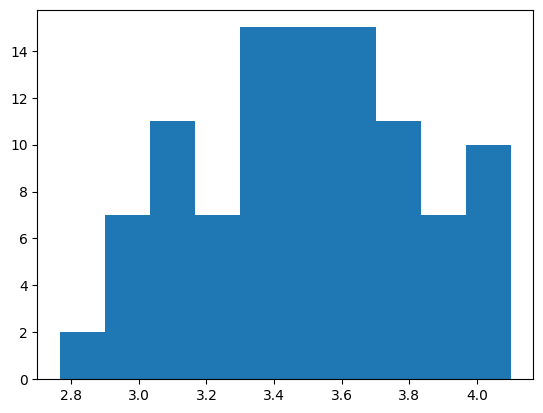

In [9]:
# Adapt code for 100 samples of size 30
means = [randint(1, 7, 30).mean() for i in range(100)]

# Create and show a histogram of the means
plt.hist(means)
plt.show()

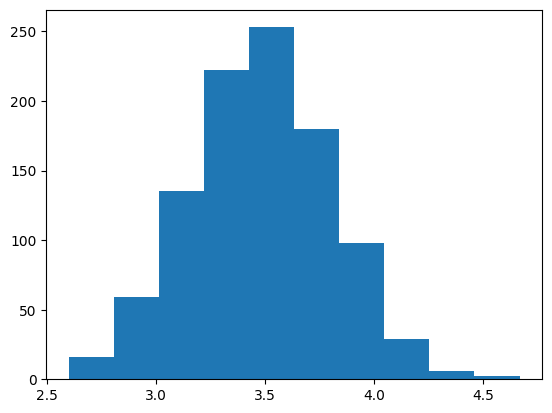

In [10]:
# Adapt code for 100 samples of size 30
means = [randint(1, 7, 30).mean() for i in range(1000)]

# Create and show a histogram of the means
plt.hist(means)
plt.show()

### Bernoulli distribution

(array([512.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 488.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

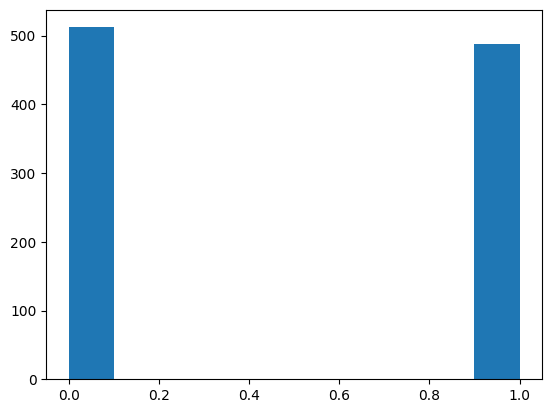

In [13]:
plt.hist(bernoulli.rvs(p=0.5,size=1000))

### Binomial distribution
- As we touched on in the slides, the binomial distribution is used to model the number of successful outcomes in trials where there is some consistent probability of success.
- For this exercise, consider a game where you are trying to make a ball in a basket. You are given 10 shots and you know that you have an 80% chance of making a given shot. To simplify things, assume each shot is an independent event.

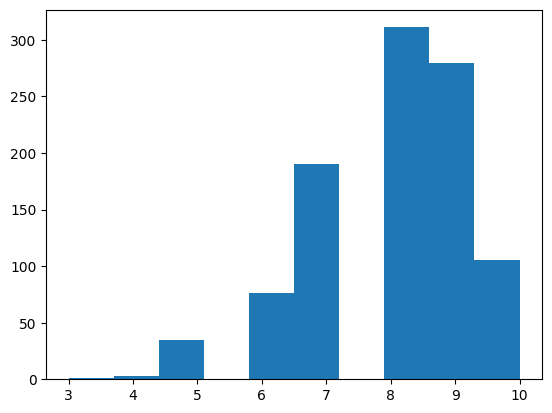

0.6241903615999999
0.10737418240000006


In [21]:
data = binom.rvs(n=10, p=0.8, size=1000)

# Plot the distribution
plt.hist(data)
plt.show()

# Assign and print probability of 8 or less successes
prob1 = binom.cdf(k=8, n=10, p=0.8)
print(prob1)

# Assign and print probability of all 10 successes
prob2 = binom.pmf(k=10, n=10, p=0.8)
print(prob2)

(array([ 12.,  42., 113., 210., 244., 218., 111.,  42.,   7.,   1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

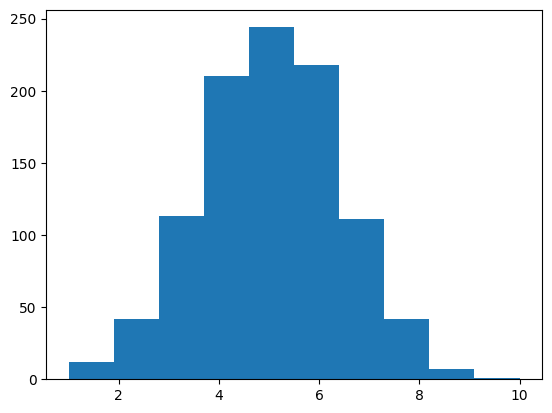

In [18]:
plt.hist(binom.rvs(n=10,p=0.5,size=1000),bins=10)

### Normal distribution
- On to the most recognizable and useful distribution of the bunch: the normal or Gaussian distribution. In the slides, we briefly touched on the bell-curve shape and how the normal distribution along with the central limit theorem enables us to perform hypothesis tests.
- Similar to the previous exercises, here you'll start by simulating some data and examining the distribution, then dive a little deeper and examine the probability of certain observations taking place.

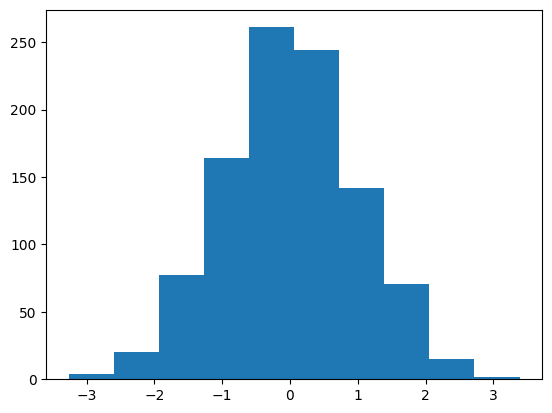

0.02275013194817921
0.019


In [22]:
# Generate normal data
from scipy.stats import norm
data = norm.rvs(size=1000)

# Plot distribution
plt.hist(data)
plt.show()

# Compute and print true probability for greater than 2
true_prob = 1 - norm.cdf(2)
print(true_prob)

# Compute and print sample probability for greater than 2
sample_prob = sum(obs > 2 for obs in data) / len(data)
print(sample_prob)

### Mean or Median

In [17]:
# import a public data in python
data = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
data

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


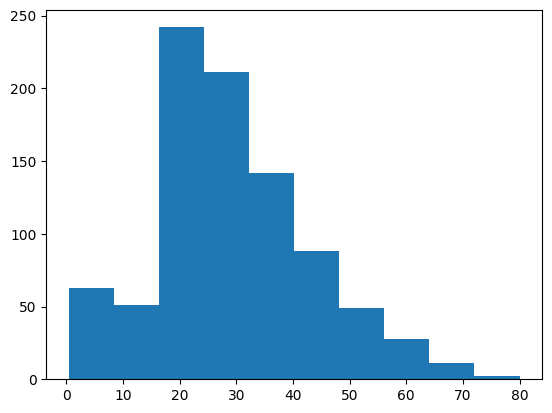

Mean: 29.471443066516347
Median: 28.0


In [6]:
# Visualize the distribution 
plt.hist(data['Age'])
plt.show()

# Assign the mean to the variable and print the result
mean = data['Age'].mean()
print('Mean:', mean)

# Assign the median to the variable and print the result
median = data['Age'].median()
print('Median:', median)

### Standard deviation

In [7]:
# Create a sample list
import math
nums = [1, 2, 3, 4, 5]

# Compute the mean of the list
mean = sum(nums)/len(nums)

# Compute the variance and print the std of the list
variance = sum(pow(x - mean, 2) for x in nums) / len(nums)
std = pow(variance,0.5)
print(std)

# Compute and print the actual result from numpy
real_std = np.array(nums).std()
print(real_std)

1.4142135623730951
1.4142135623730951


### Encoding techniques

In [12]:
data.head(n=2)

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [10]:
# Create the encoder and print our encoded new_vals
encoder = preprocessing.LabelEncoder()
new_vals = encoder.fit_transform(data['Sex'])
print(new_vals)

[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0
 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1
 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0
 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 

In [13]:
# One-hot encode Company for laptops2
laptops2 = pd.get_dummies(data=data, columns=['Sex'])
print(laptops2.head())

   Survived  Pclass   Age  Siblings/Spouses  Parents/Children     Fare  \
0         0       3  22.0                 1                 0   7.2500   
1         1       1  38.0                 1                 0  71.2833   
2         1       3  26.0                 0                 0   7.9250   
3         1       1  35.0                 1                 0  53.1000   
4         0       3  35.0                 0                 0   8.0500   

   Sex_female  Sex_male  
0       False      True  
1        True     False  
2        True     False  
3        True     False  
4       False      True  


### Exploring the dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


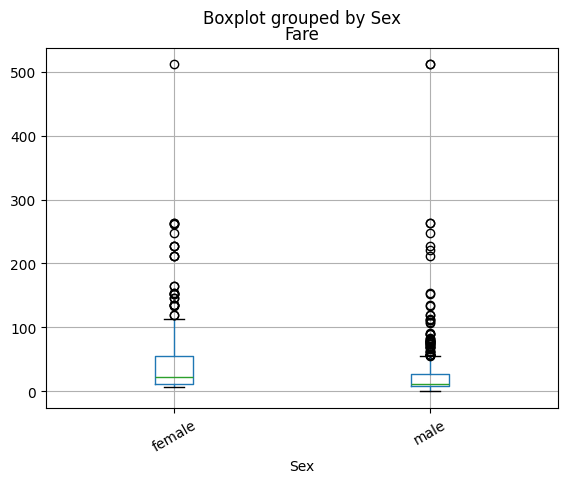

In [27]:
# Visualize the relationship with price
data.boxplot('Fare','Sex', rot=30)
plt.show()

### Types of relationship

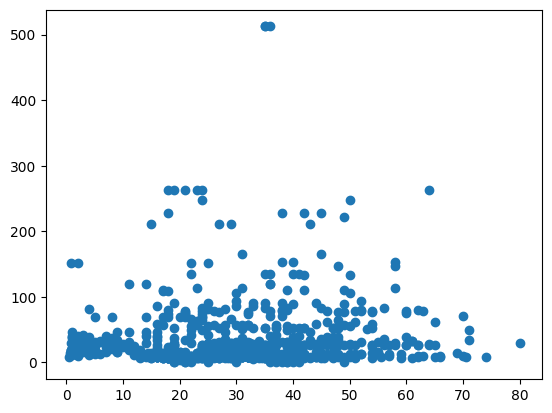

In [29]:
# Display a scatter plot and examine the relationship
plt.scatter(data["Age"],data["Fare"])
plt.show()

### Pearson correlation

/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/scarlett/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

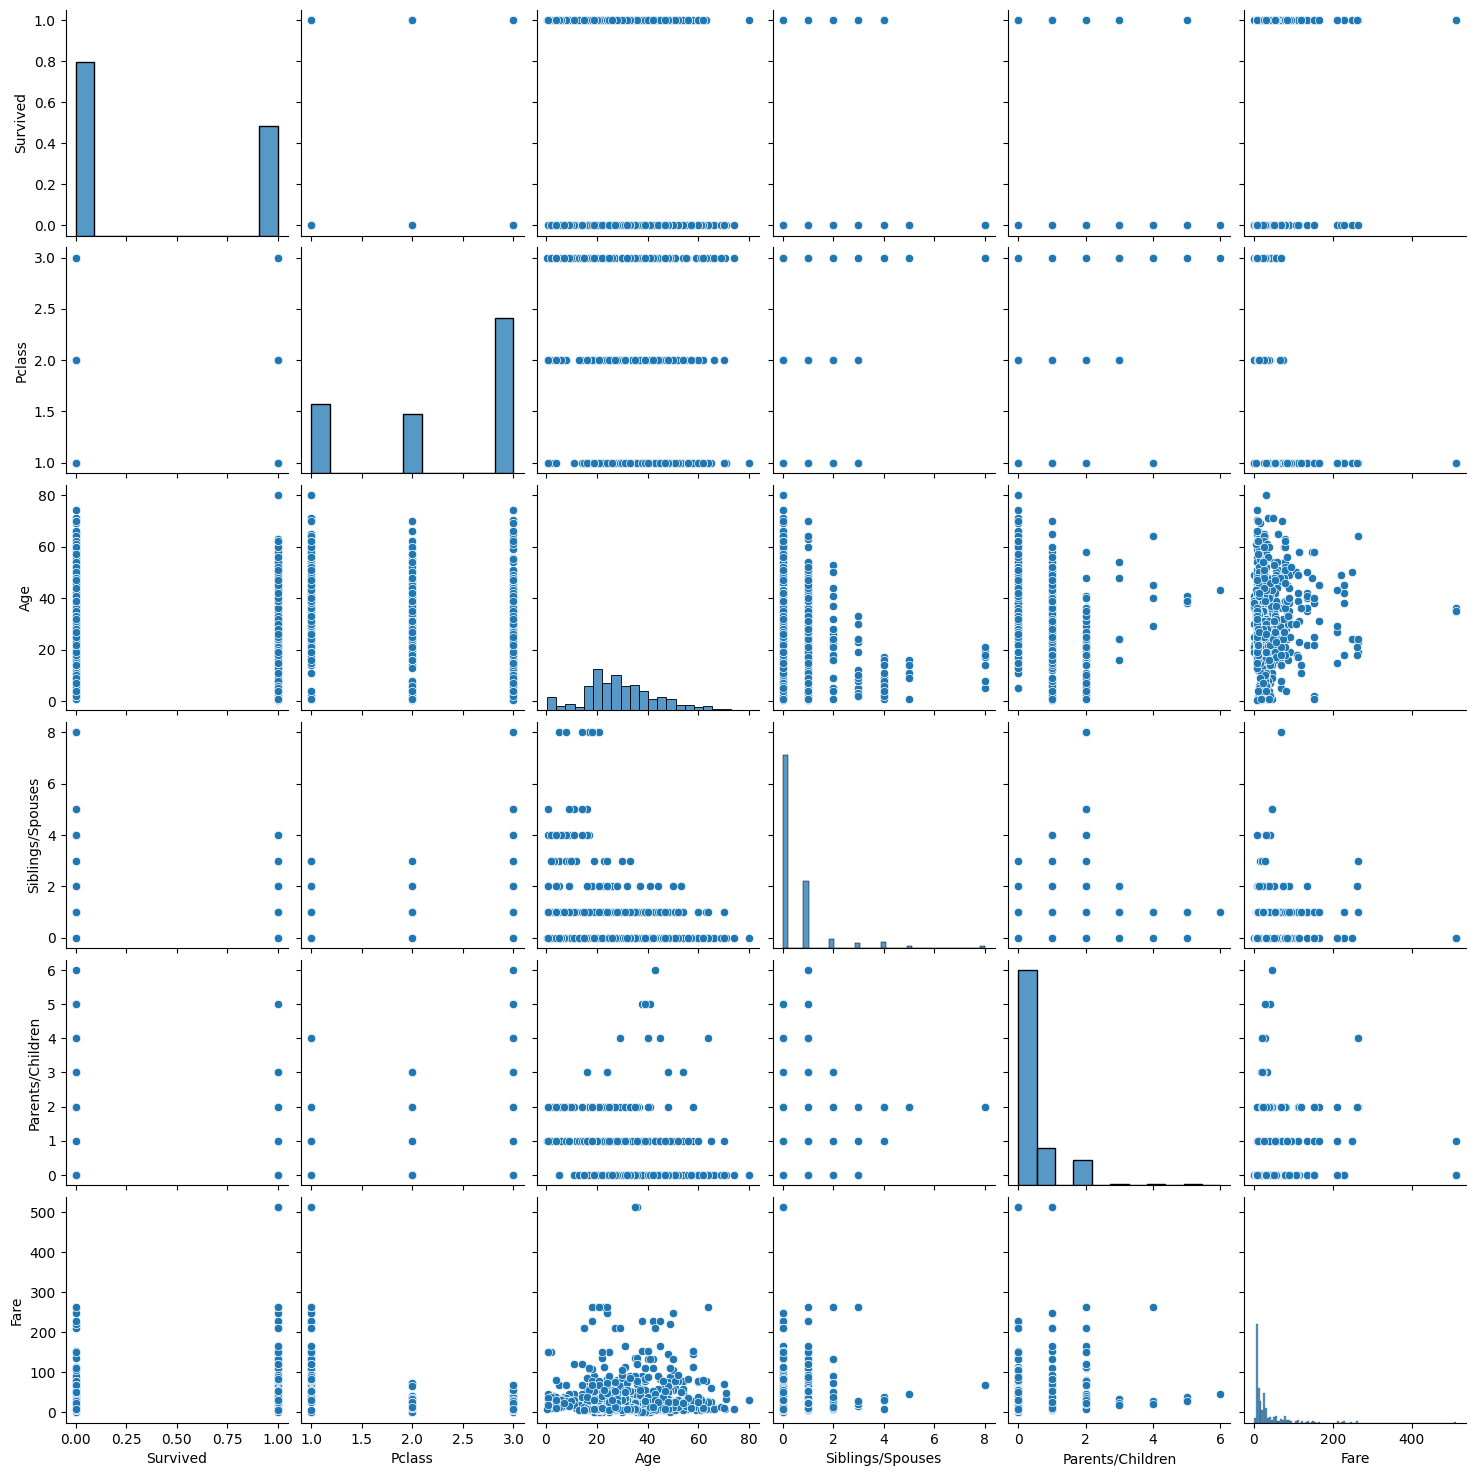

In [30]:
# Generate the pair plot for the weather dataset
sns.pairplot(data)
plt.show()

In [32]:
# Compute and print the Pearson correlation
r = data['Fare'].corr(data['Age'])
print(r)

# Calculate the r-squared value and print the result
r2 = r**2
print(r2)

0.11232863699941618
0.012617722690146611


### Drop outlier using index

In [35]:
# Drop the outlier from the dataset
df = data.drop(886)

# Compute and print the correlation once more
new_corr  = data['Fare'].corr(data['Age'])
print(new_corr)

0.11232863699941618


### confidence interval

In [37]:
a = range(10,14)
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(9.445739743239121, 13.554260256760879)

In [47]:
proportion_confint(4, 10, alpha=0.05, method='normal')

(0.09636368514840155, 0.7036363148515985)

In [50]:
data = [1, 2, 3, 4, 5]
confidence = 0.95
z_score = 2.7764451051977987
# get mean from data
sample_mean = np.mean(data)

# Compute the standard error and margin of error
std_err = sem(data)
margin_error = std_err * z_score

# Compute and print the lower threshold
lower = sample_mean - margin_error
print(lower)

# Compute and print the upper threshold
upper = sample_mean + margin_error
print(upper)

1.036756838522439
4.9632431614775605


In [ ]:
# Compute and print the 99% confidence interval
confidence_int = proportion_confint(heads, 50, 0.01)
print(confidence_int)

In [ ]:
# Compute and print the 90% confidence interval
confidence_int = proportion_confint(heads, 50, 0.1)
print(confidence_int)

In [51]:
# Repeat this process 10 times 
heads = binom.rvs(50, 0.5, size=10)
for val in heads:
    confidence_interval = proportion_confint(val, 50, .10)
    print(confidence_interval)

(0.2860411978842442, 0.5139588021157558)
(0.3836912846323326, 0.6163087153676674)
(0.3836912846323326, 0.6163087153676674)
(0.46518968814451866, 0.6948103118554813)
(0.36378436885322046, 0.5962156311467796)
(0.36378436885322046, 0.5962156311467796)
(0.36378436885322046, 0.5962156311467796)
(0.24834363324703929, 0.4716563667529607)
(0.2860411978842442, 0.5139588021157558)
(0.2860411978842442, 0.5139588021157558)


### One tailed z-test

In [55]:
# import a public data in python
data = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
data

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [56]:
# Assign and print the conversion rate for each group
conv_rates = data.groupby('Sex').mean()
print(conv_rates)

        Survived    Pclass        Age  Siblings/Spouses  Parents/Children  \
Sex                                                                         
female  0.742038  2.159236  27.719745          0.694268          0.649682   
male    0.190227  2.385689  30.431361          0.432810          0.237347   

             Fare  
Sex                
female  44.479818  
male    25.633935  


In [57]:
# Assign the number of control conversions and trials
num_survival = data[data['Sex'] == 'male']['Survived'].sum()
total_control = len(data[data['Sex'] == 'male'])

In [ ]:
# Assign the number of conversions and total trials
num_control = results[results['Group'] == 'control']['Converted'].sum()
total_control = len(results[results['Group'] == 'control'])

# Assign the number of conversions and total trials
num_treat = results[results['Group'] == 'treatment']['Converted'].sum()
total_treat = len(results[results['Group'] == 'treatment'])

from statsmodels.stats.proportion import proportions_ztest
count = np.array([num_treat, num_control]) 
nobs = np.array([total_treat, total_control])

# Run the z-test and print the result 
stat, pval = proportions_ztest(count, nobs, alternative="larger")
print('{0:0.3f}'.format(pval))

### two tailed t-test

In [ ]:
# Display the mean price for each group
prices = laptops.groupby('Company').mean()
print(prices)

In [ ]:
# Assign the prices of each group
asus = laptops[laptops['Company'] == 'Asus']['Price']
toshiba = laptops[laptops['Company'] == 'Toshiba']['Price']

In [ ]:
# Assign the prices of each group
asus = laptops[laptops['Company'] == 'Asus']['Price']
toshiba = laptops[laptops['Company'] == 'Toshiba']['Price']

# Run the t-test
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(asus, toshiba)
print('{0:0.3f}'.format(pval))

### calculate sample size

- Standardize the effect of a conversion rate increase from 20% to 25% success using the proportion_effectsize() function.

In [ ]:
# Standardize the effect size
from statsmodels.stats.proportion import proportion_effectsize
std_effect = proportion_effectsize(0.2,0.25)

- Calculate and print the needed sample size using the zt_ind_solve_power() function.

In [ ]:
# Assign and print the needed sample size
from statsmodels.stats.power import  zt_ind_solve_power
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=.05, power=.95)
print(sample_size)

- Adapt your code to solve for needed sample size using 80% power instead; observe what happens.

In [ ]:
# Assign and print the needed sample size
from statsmodels.stats.power import  zt_ind_solve_power
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=.05, power=.80)
print(sample_size)

### Visualizing the relationship

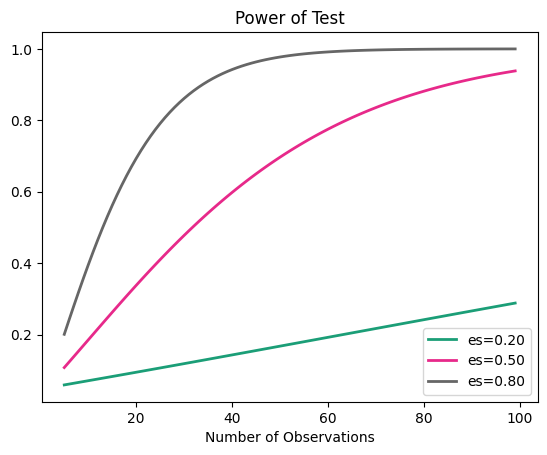

In [58]:
sample_sizes = np.array(range(5, 100))
effect_sizes = np.array([0.2, 0.5, 0.8])

# Create results object for t-test analysis
from statsmodels.stats.power import TTestIndPower
results = TTestIndPower()

# Plot the power analysis
results.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

### calculate error rates
- Your colleague is strongly considering running 60 distinct hypothesis tests. In order to convince them otherwise, compute the probability of a Type I error for 60 hypothesis tests with a single-test 5% significance level.
- Print error rate for 60 tests with 5% significance

In [59]:
# Print error rate for 60 tests with 5% significance
error_rate = 1 - (.95**(60))
print(error_rate)

0.953930201013048


- You successfully talked them down to 30 tests; adapt your code to compute and print the new error rate.

In [60]:
# Print error rate for 30 tests with 5% significance
error_rate = 1 - (.95**(30))
print(error_rate)

0.7853612360570628


### Bonferroni correction
- Use a single-test significance level of .05 and observe how the Bonferroni correction affects our sample list of p-values already created.
- Compute a list of the Bonferroni adjusted p-values using the imported multipletests() function.
    - Print the results of the multiple hypothesis tests returned in index 0 of your p_adjusted variable.
    - Print the p-values themselves returned in index 1 of your p_adjusted variable.

In [61]:
from statsmodels.sandbox.stats.multicomp import multipletests
pvals = [.01, .05, .10, .50, .99]

# Create a list of the adjusted p-values
p_adjusted = multipletests(pvals, alpha=.05, method='bonferroni')

# Print the resulting conclusions
print(p_adjusted[0])

# Print the adjusted p-values themselves 
print(p_adjusted[1])

[ True False False False False]
[0.05 0.25 0.5  1.   1.  ]


### Linear regression

### Logistic regression